# Exploring Distributions with Pandas and Seaborn

**GOALS**:

- Use multiple visualization strategies to examine the shape of a distribution
- Use `skew` and `kurtosis` measures to understand the nature of a distribution
- Transform a distribution using `log`

---


Let's start by taking a quick look at some basic descriptives using their appropriate methods.


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips['total_bill'].mean()

19.785942622950824

In [8]:
tips['total_bill'].median()

17.795

In [9]:
tips['total_bill'].std()

8.902411954856856

In [10]:
tips['total_bill'].mode()

0    13.42
dtype: float64

In [11]:
tips['total_bill'].max()

50.81

### Plotting from the DataFrame

Pandas comes with a built in plotting method.  You can simply apply the `.plot()` to a DataFrame and it will generate a default visualization for the data.  We can then pass a variety of methods to the plot to get a better feel for the data.  For example, we can see the five number summaries with the `boxplot` method.  To see these values numerically, we can use the `.describe()` method.

<IPython.core.display.Javascript object>


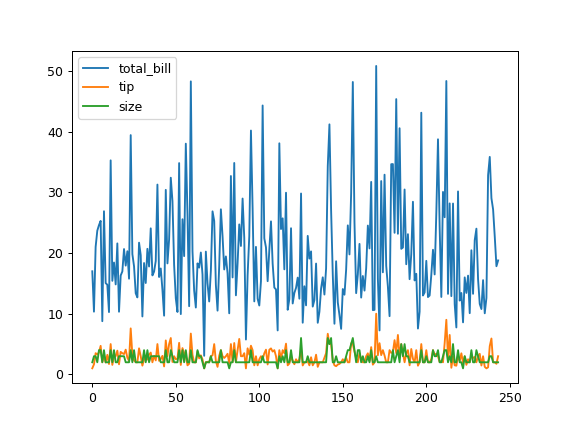

In [12]:
tips.plot()

In [13]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<IPython.core.display.Javascript object>


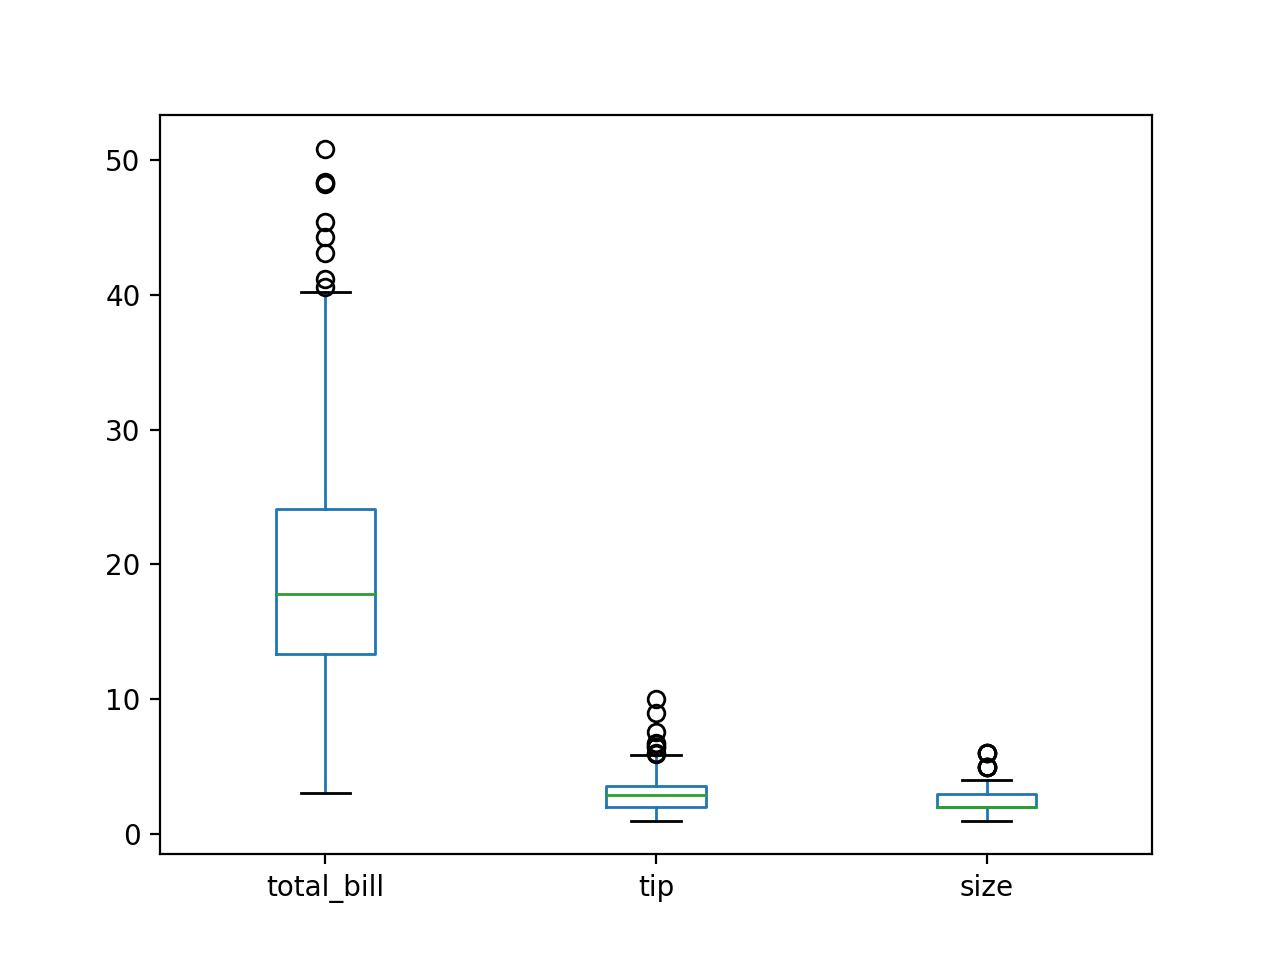

In [11]:
#make a specific kind of plot
tips.plot(kind = 'box')

<IPython.core.display.Javascript object>


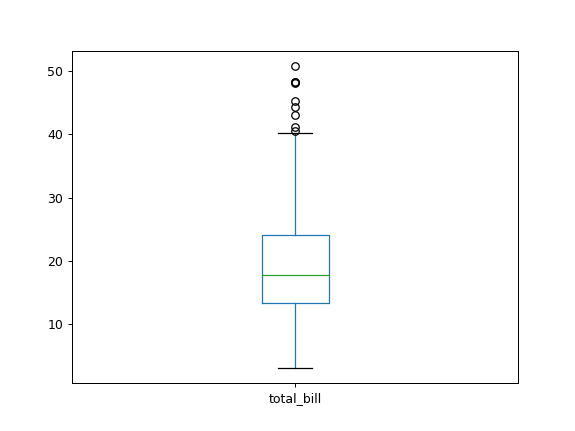

In [14]:
#make a plot of single feature
plt.figure()
tips['total_bill'].plot(kind = 'box')

<IPython.core.display.Javascript object>


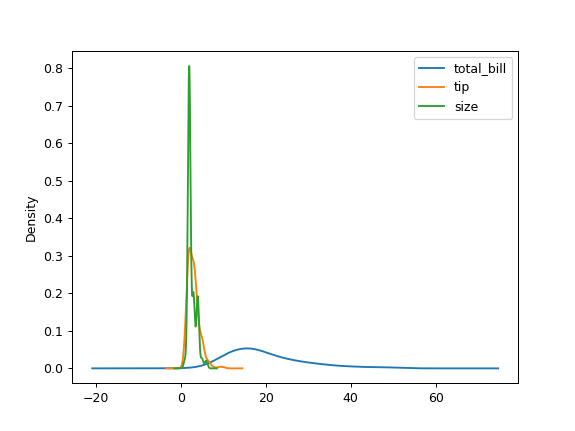

In [15]:
tips.plot(kind = 'density')

### Seaborn

The Seaborn plotting library allows us some extra features to easily investigate our dataset with visualizations.  For full documentation see the [website](http://seaborn.pydata.org/index.html).  We will use this to explore a dataset containing information about a number of cars tested for motor trend magazine.  Today, we are interested in relationships of distributions and comparing variables.

![](https://raw.githubusercontent.com/generalassembly-studio/DS-course-materials/master/lessons/lesson-03/assets/images/biasVsVarianceImage.png?token=ARqVFAe4r4g0amgCQyYoIzrs9Xsfst8oks5awq6twA%3D%3D)

In [93]:
mtcars = pd.read_csv('mtcars.csv')

In [94]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


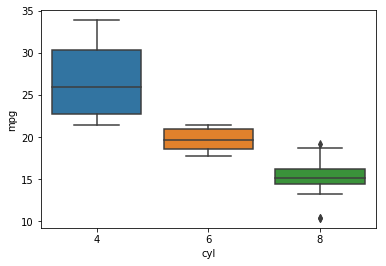

In [95]:
plt.figure()
sns.boxplot('cyl', 'mpg', data = mtcars)

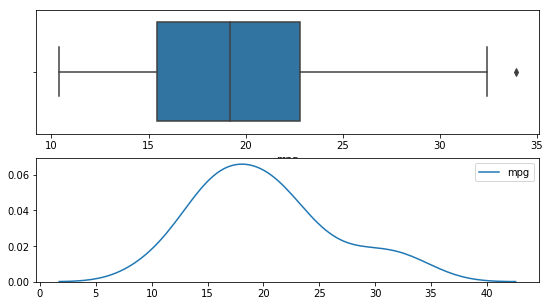

In [96]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(mtcars['mpg'])

plt.subplot(212)
sns.kdeplot(mtcars['mpg'])

### Splitting by Category



In [97]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


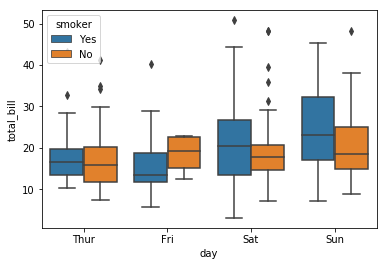

In [98]:
plt.figure()
sns.boxplot('day', 'total_bill', hue = 'smoker', data = tips)

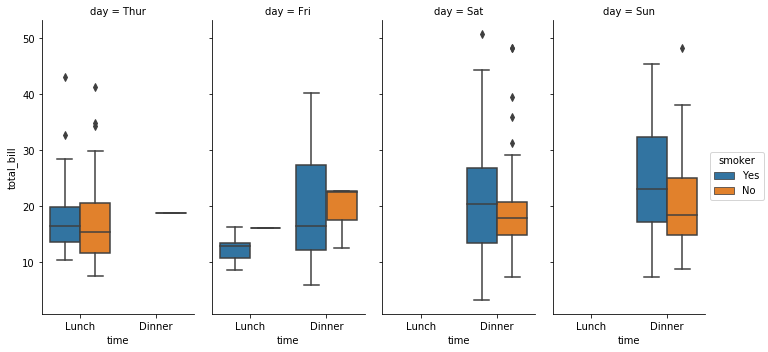

In [99]:
%matplotlib inline
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=5, aspect=.5)

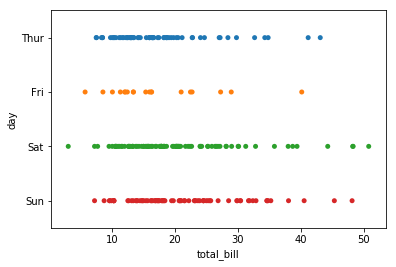

In [100]:
plt.figure()
sns.stripplot("total_bill", "day", data = tips)

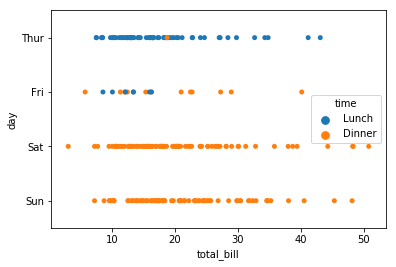

In [101]:
plt.figure()
sns.stripplot("total_bill", "day", hue = "time", data = tips)

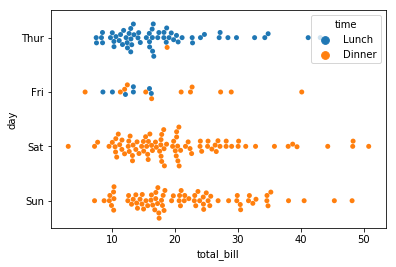

In [102]:
plt.figure()
sns.swarmplot("total_bill", "day", hue = "time", data = tips)

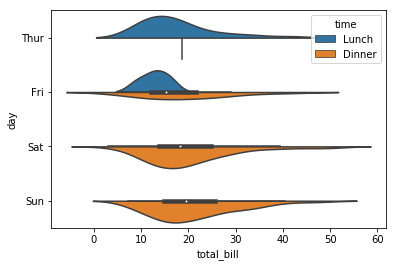

In [103]:
plt.figure()
sns.violinplot("total_bill", "day", hue = "time", data = tips, split = True)

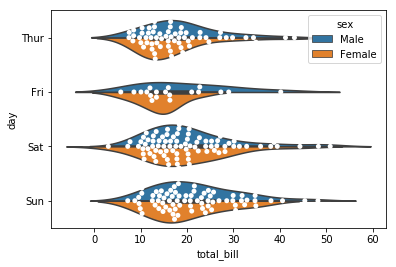

In [104]:
plt.figure()
sns.violinplot("total_bill", "day", hue = "sex", data = tips, split = True)
sns.swarmplot("total_bill", "day", data = tips, color = "w",dodge = True)

In [105]:
titanic = sns.load_dataset('titanic')

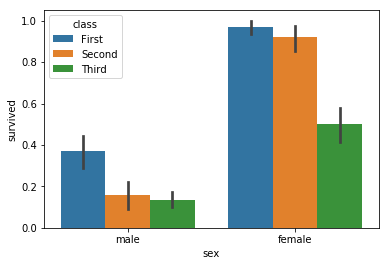

In [106]:
plt.figure()
sns.barplot('sex', 'survived', hue = 'class', data = titanic)

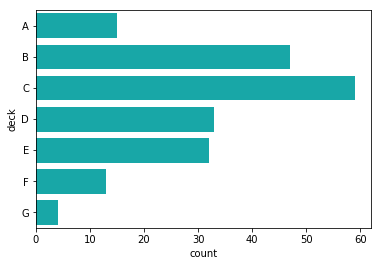

In [107]:
plt.figure()
sns.countplot(y = "deck", data = titanic, color = "c")

### Exploration

The dataset below comes to us from the `seaborn` data utility.  Please explore this data and improve upon my rather meaningless boxplot.

In [108]:
crash = sns.load_dataset('car_crashes')

In [109]:
crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [110]:
crash.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


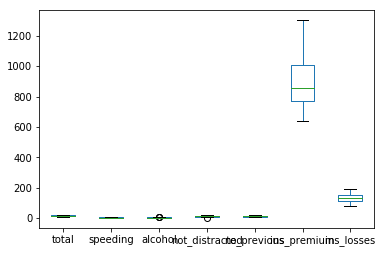

In [111]:
crash.plot(kind='box')

In [112]:
crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [113]:
crash[crash.abbrev=="NY"]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
32,12.3,3.936,3.567,10.824,9.84,1234.31,150.01,NY


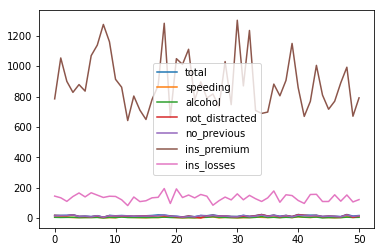

In [114]:
crash.plot()

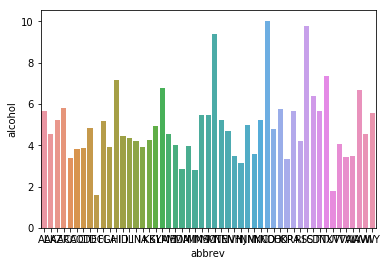

In [115]:
plt.figure()
sns.barplot('abbrev','alcohol', data = crash)

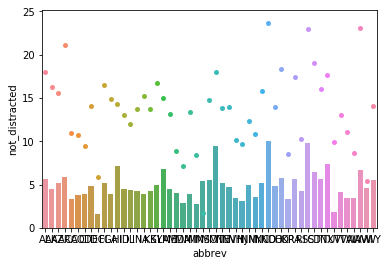

In [116]:
plt.figure()
sns.barplot('abbrev','alcohol', data = crash)
sns.swarmplot('abbrev','not_distracted', data = crash)

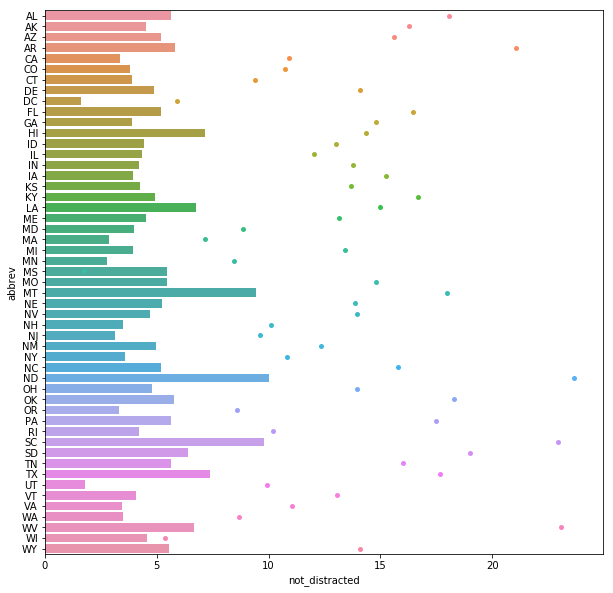

In [117]:
plt.figure(figsize = (10,10))
sns.barplot('alcohol','abbrev', data = crash)
sns.swarmplot('not_distracted','abbrev', data = crash)

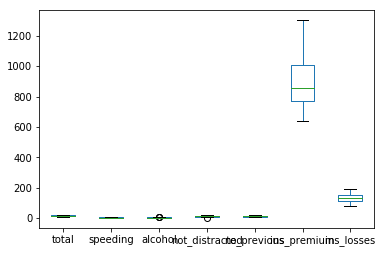

In [118]:
crash.plot(kind = 'box')

### Skew and Kurtosis


A normal distribution is a key assumption to many models we will later be using. But what is normal?

The graph of the normal distribution depends on two factors - the mean and the standard deviation. The mean of the distribution determines the location of the center of the graph, and the standard deviation determines the height of the graph. When the standard deviation is large, the curve is short and wide; when the standard deviation is small, the curve is tall and narrow. All normal distributions look like a symmetric, bell-shaped curve.

Two metrics are commonly used to describe your distribution: skewness and kurtosis.

**Skewness**


In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or even undefined.

**Kurtosis**


Kurtosis is a measure of whether the data are peaked or flat relative to a normal distribution.That is, data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails.

In [119]:
a = np.random.normal(40, 10, 10000)
norm = pd.DataFrame({'nums':a})

In [120]:
norm.head()

,nums
0,37.504736
1,34.432799
2,20.380642
3,27.912222
4,36.531162


This distribution has skew nums    0.026736
dtype: float64
This distribution has kurtosis nums   -0.084105
dtype: float64


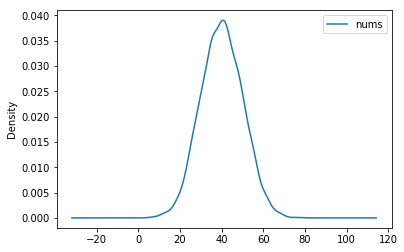

In [121]:
norm.plot(kind = 'density')
print('This distribution has skew', norm.skew())
print('This distribution has kurtosis', norm.kurt())

Similarly, we can examine data from a real dataset to understand something similar.

In [122]:
mtcars["mpg"].skew()

0.6723771376290805

In [123]:
mtcars["mpg"].kurt()

-0.0220062914240855

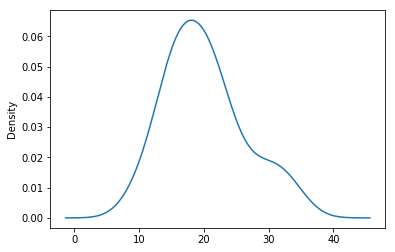

In [124]:
plt.figure()
mtcars["mpg"].plot(kind = 'density')

**Other Distributions**

There are many different kinds of distributions.  Some of the most popular and basic are the *normal, exponential,* and *uniform*.  Here we can create and plot a DataFrame with randomly generated values.  

In [125]:
norm = np.random.normal(size = 10000)
exp = np.random.exponential(size = 10000)
uni = np.random.uniform(-1,1,10000)
dist = pd.DataFrame({"norm": norm, "exp": exp, "uniform": uni})
dist.head()

,exp,norm,uniform
0,1.491656,0.302752,0.031057
1,0.145701,1.322983,0.152367
2,0.537111,-1.559406,-0.204140
3,0.116930,-1.146759,-0.968544
4,0.721556,1.423618,0.706332


<IPython.core.display.Javascript object>


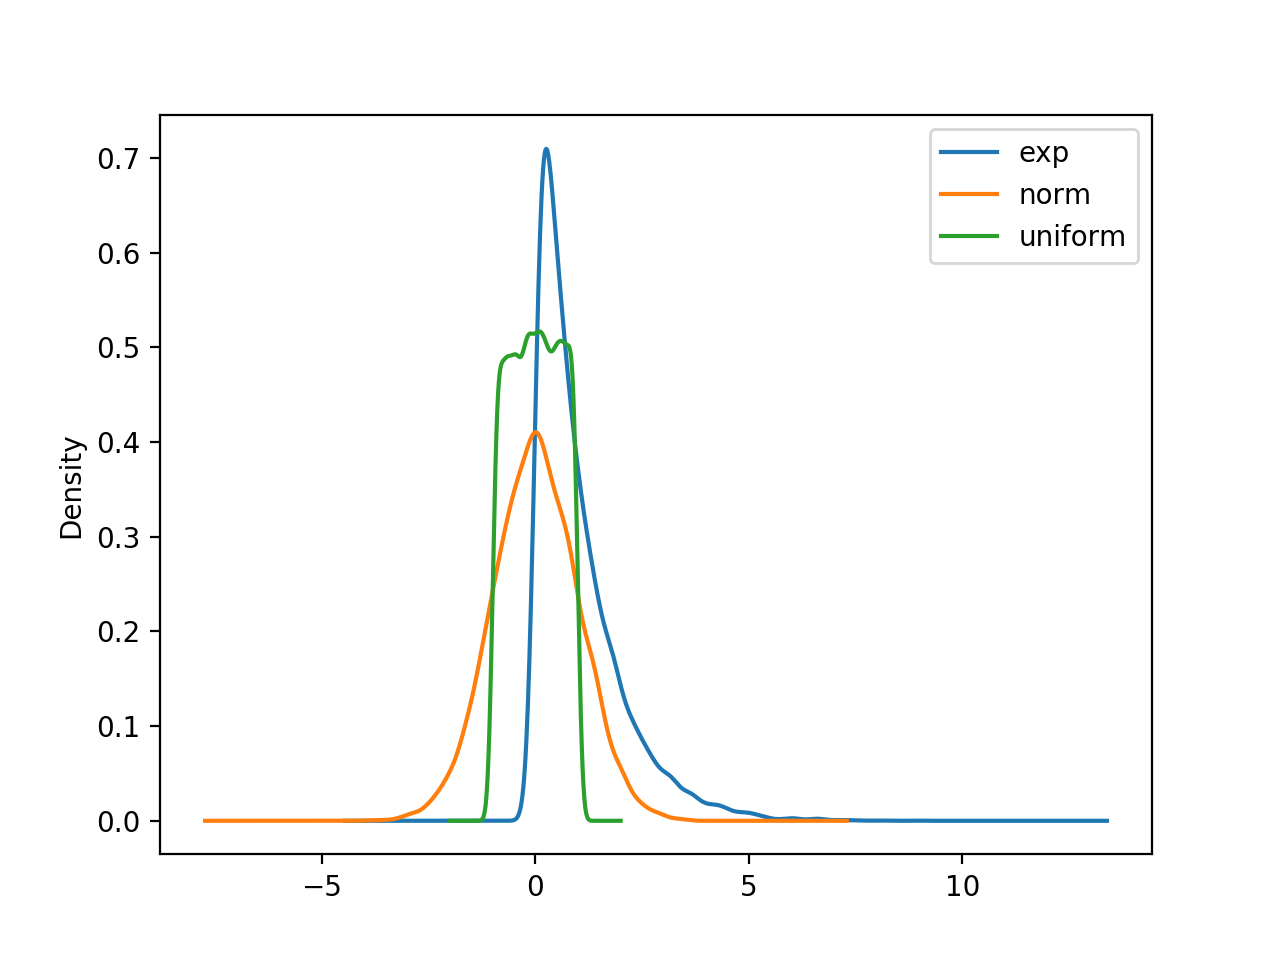

In [71]:
dist.plot(kind = 'density')

In [126]:
dist.skew()

exp        1.896482
norm       0.017958
uniform    0.003970
dtype: float64

In [129]:
dist.kurt()

exp        4.828934
norm      -0.020507
uniform   -1.189977
dtype: float64

### Practice

The following dataset comes from the UCI Machine Learning Datasets.  First, let's take a look at what the data is about.

https://archive.ics.uci.edu/ml/datasets/glass+identification

Can you tell me about the glass refractive index of the different kinds of glass?

In [185]:
glass = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data', index_col = 0, header = None, sep = ',')

In [186]:
glass.index.rename(['id'])

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            205, 206, 207, 208, 209, 210, 211, 212, 213, 214],
           dtype='int64', name=['id'], length=214)

In [187]:
columns = [ 'ri', 'Na','Mg', 'Al','Si','K', 'Ca', 'Ba', 'Fe', 'type']

In [188]:
glass.columns = columns

In [189]:
glass.columns

Index(['ri', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [190]:
glass.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [191]:
## finish this for me
a = []
for name in glass['type']:
    if name == 1:
        a.append('b_windows')
    elif name == 2:
        a.append('b_windows')
    elif name == 3:
        a.append('v_windows')
    elif name == 4:
        a.append('v_windows')
    elif name == 5: 
        a.append('containers')
    elif name == 6:
        a.append('tableware')
    elif name == 7: 
        a.append('headlamps')
    else:
        a.apped('error')

In [192]:
glass.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [193]:
glass['kind'] = a

In [194]:
glass.head()

,ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,type,kind
0,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,b_windows
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,b_windows
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,b_windows
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,b_windows
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,b_windows


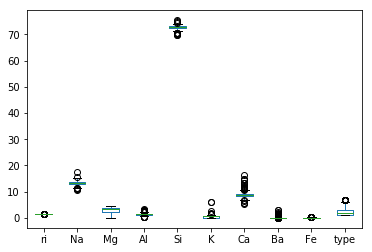

In [197]:
glass.plot(kind = 'box')

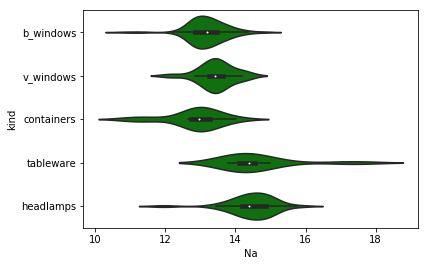

In [199]:
plt.figure()
sns.violinplot("Na","kind", data = glass, color = "green")

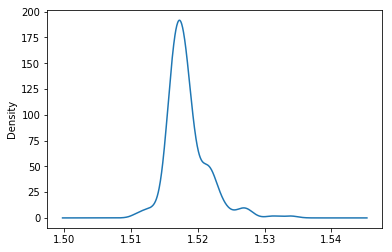

In [200]:
glass['ri'].plot(kind= 'density')

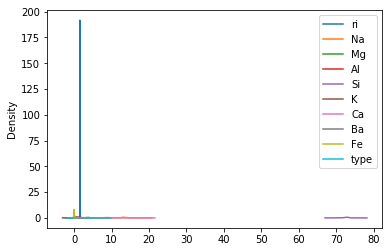

In [201]:
glass.plot(kind = 'density')